In [50]:
import numpy as np #Import Python Library (This is where the data is stored and pulled from the csv)
import pandas as pd # Import software library (This is a software library written for python) This library is used for data manipulation and analysis
import matplotlib.pyplot as plt #Import plotting library (This is used to display graphical data)
import scipy.stats as stats #Import python library (This is used for scientific computations)

In [64]:
data0 = np.genfromtxt('LeafStageVar_x.csv',delimiter = ',', skip_header = 1) # This generates data from the csv text
data0 = pd.DataFrame(data0) # This arranges the csv data into an object that pandas can use
data = data0.drop(data0.columns[0:3],axis = 1) # This removes columns two and three, which are the plant species and plant number,these will be added back in the final step
plt.rcParams['figure.figsize'] = (20,10) # This sets the parameters for the size of the figure

In [65]:
data0

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,318684.0,1.0,94.737452,196.644672,1776.847433,14.015541,6214.957396,1986.070463,18823.60057,...,191.923742,0.081735,0.811444,33.255243,95.859746,0.005128,16.256776,5.981147,0.278855,0.024450
1,NaN,588141.0,1.0,23.352362,131.009202,1166.801218,15.981347,5660.589666,1305.737926,15284.87070,...,101.724123,0.048140,0.343131,33.814473,69.386864,0.017477,7.492277,3.537671,0.156314,0.060345
2,NaN,588646.0,1.0,137.680886,111.022071,1976.897836,26.302390,7208.531961,2512.636791,20787.04128,...,146.973893,0.063966,0.277827,58.400894,83.124578,0.004849,7.214685,3.383637,0.297982,0.017739
3,NaN,588448.0,1.0,18.207032,58.447077,1469.811734,24.007341,5342.222323,2400.683753,16094.43910,...,218.874289,0.099867,0.416359,55.600415,120.534218,0.010221,11.923196,1.183187,0.171235,0.038915
4,NaN,1583.0,1.0,58.775194,119.388231,1349.136877,67.323999,5412.124249,2412.665543,17162.72458,...,357.633934,0.169915,0.658896,68.828553,153.686687,0.060230,7.493530,1.004368,0.194630,0.021889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,483184.0,8.0,23.959331,68.082473,833.263322,14.223409,4453.316979,1577.213543,13845.07525,...,265.737020,0.132533,0.571258,52.450855,89.326233,0.015168,2.262299,1.335820,0.500273,0.021432
196,NaN,483188.0,8.0,97.260086,177.251767,1001.935219,14.787185,4185.088107,1616.720403,14511.86532,...,265.065594,0.103872,0.493594,55.975908,80.988379,0.012150,2.278884,1.760048,0.388168,0.032249
197,NaN,483190.0,8.0,118.418595,142.109108,1208.820270,26.843473,4462.374828,2092.301281,14404.28727,...,319.821056,0.141606,0.505986,50.276855,134.466411,0.018501,2.082073,1.355822,0.104287,0.040485
198,NaN,483187.0,8.0,247.246548,388.678285,1709.199420,24.868124,5198.472128,2422.367553,14335.07116,...,365.062978,0.144896,0.667751,62.193586,157.650724,0.018435,2.138815,5.008329,0.176858,0.060998


In [66]:
data

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,94.737452,196.644672,1776.847433,14.015541,6214.957396,1986.070463,18823.60057,5107.996944,45.755582,191.923742,0.081735,0.811444,33.255243,95.859746,0.005128,16.256776,5.981147,0.278855,0.024450
1,23.352362,131.009202,1166.801218,15.981347,5660.589666,1305.737926,15284.87070,3971.658387,40.226177,101.724123,0.048140,0.343131,33.814473,69.386864,0.017477,7.492277,3.537671,0.156314,0.060345
2,137.680886,111.022071,1976.897836,26.302390,7208.531961,2512.636791,20787.04128,5653.053084,65.567369,146.973893,0.063966,0.277827,58.400894,83.124578,0.004849,7.214685,3.383637,0.297982,0.017739
3,18.207032,58.447077,1469.811734,24.007341,5342.222323,2400.683753,16094.43910,3800.777526,60.854345,218.874289,0.099867,0.416359,55.600415,120.534218,0.010221,11.923196,1.183187,0.171235,0.038915
4,58.775194,119.388231,1349.136877,67.323999,5412.124249,2412.665543,17162.72458,2307.560196,91.539069,357.633934,0.169915,0.658896,68.828553,153.686687,0.060230,7.493530,1.004368,0.194630,0.021889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23.959331,68.082473,833.263322,14.223409,4453.316979,1577.213543,13845.07525,2670.873577,36.033468,265.737020,0.132533,0.571258,52.450855,89.326233,0.015168,2.262299,1.335820,0.500273,0.021432
196,97.260086,177.251767,1001.935219,14.787185,4185.088107,1616.720403,14511.86532,2951.506577,38.816688,265.065594,0.103872,0.493594,55.975908,80.988379,0.012150,2.278884,1.760048,0.388168,0.032249
197,118.418595,142.109108,1208.820270,26.843473,4462.374828,2092.301281,14404.28727,2182.446643,44.998215,319.821056,0.141606,0.505986,50.276855,134.466411,0.018501,2.082073,1.355822,0.104287,0.040485
198,247.246548,388.678285,1709.199420,24.868124,5198.472128,2422.367553,14335.07116,5729.398750,64.358779,365.062978,0.144896,0.667751,62.193586,157.650724,0.018435,2.138815,5.008329,0.176858,0.060998


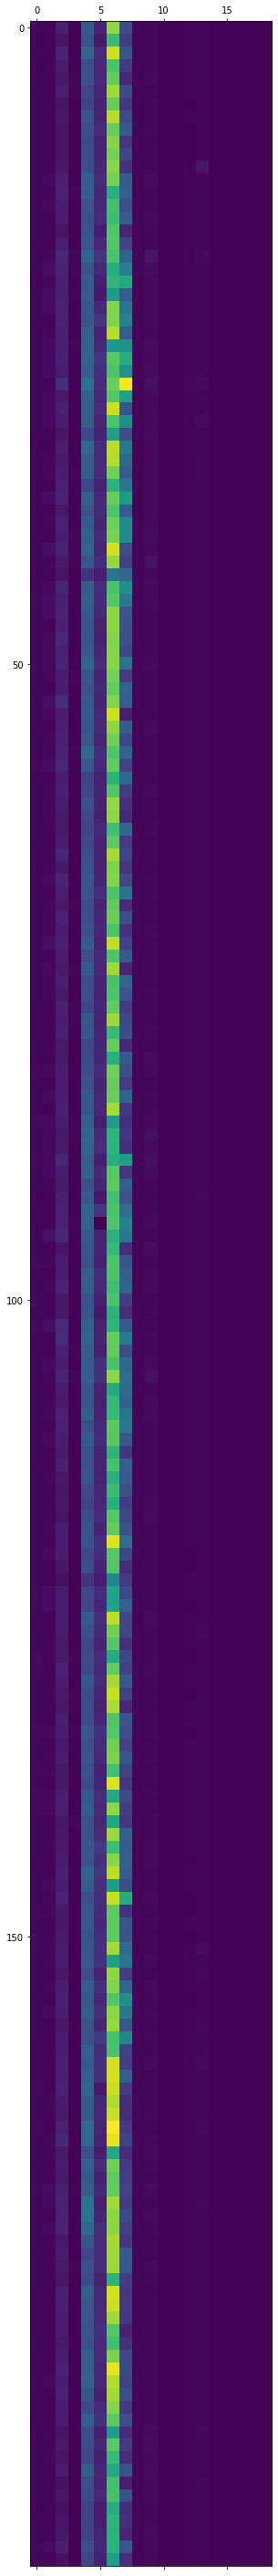

In [67]:
plt.figure(figsize=(5,50)) # This sets the parameters of the following figure which is a heatmap
plt.matshow(data,fignum =1) # This shows the graphic of the heatmap

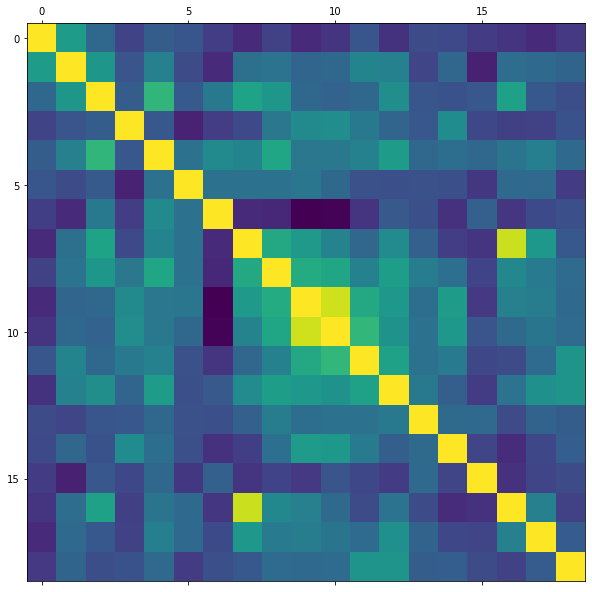

In [68]:
plt.matshow(data.corr()) # This creates the correlation matrix shown below

In [74]:
z = pd.DataFrame(np.arange(4400).reshape(200,22)) #This creates a dummy dataframe for our z value
z = z.astype('float32') #Float is used when storing data with decimal points to keep it precise 
z.drop(z.columns[0:3],axis = 1, inplace = True ) #This drops two columns in our dummy dataframe

In [77]:
for x in range(3,(data.shape[1]+3)): #This gives the dimensions of the array along the x axis
    mean = data[x].mean() #This gives the average of one column of data on the x axis
    stdev = data[x].std() #This gives the standard deviation of one column of the the x axis
    print(x,"m: ",mean,"s: ",stdev) #This prints the mean and standard deviation of the individual columns
    for y in range(data.shape[0]): #This gives the dimension of the array along the y axis
        zscore = (data[x][y] - mean)/stdev #This is the equation that gives us the z score
        z[x][y] = zscore #Assigning the name zscore to the value obtained from the equation
        if data[x][y] < 0: #If the data obtained is less than zero
            z[x][y] = "NaN" #Then it is not treated as a number
z

3 m:  105.95822617819996 s:  70.26951972682986
4 m:  222.04625389110018 s:  145.6568251317305
5 m:  1590.9897767725001 s:  329.69372755841295
6 m:  20.527774482154985 s:  8.71949528426018
7 m:  5801.221112980004 s:  845.5806370561475
8 m:  2266.478356685 s:  468.81420969204953
9 m:  16993.782770945007 s:  2389.1899269043765
10 m:  5679.618098180002 s:  2789.1989071961116
11 m:  55.275992293650006 s:  16.80308248317708
12 m:  274.45958241425006 s:  139.257352687056
13 m:  0.12483264984999996 s:  0.06488042037215634
14 m:  1.0152354012500002 s:  1.2445102130963843
15 m:  61.239556954599976 s:  29.17652906516692
16 m:  132.87288531940007 s:  85.84906655471019
17 m:  0.016026476365 s:  0.015160782827266387
18 m:  5.6683485033449985 s:  3.3229834817566637
19 m:  4.4695560677250015 s:  2.99651444242764
20 m:  0.3389460636849999 s:  0.3334849391274051
21 m:  0.029724750210000005 s:  0.022561976304173826


,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.159682,-0.174393,0.563728,-0.746859,0.489293,-0.598122,0.765874,-0.204941,-0.566587,-0.592686,-0.664259,-0.163753,-0.959138,-0.431142,-0.718872,3.186422,0.504450,-0.180190,-0.233794
1,-1.175557,-0.625011,-1.286614,-0.521410,-0.166313,-2.049299,-0.715268,-0.612348,-0.895658,-1.240405,-1.182066,-0.540055,-0.939971,-0.739507,0.095698,0.548883,-0.310990,-0.547647,1.357145
2,0.451443,-0.762231,1.170505,0.662265,1.664313,0.525066,1.587676,-0.009524,0.612470,-0.915468,-0.938141,-0.592529,-0.097293,-0.579486,-0.737255,0.465346,-0.362394,-0.122837,-0.531246
3,-1.248780,-1.123182,-0.367547,0.399056,-0.542821,0.286266,-0.376422,-0.673613,0.331984,-0.399155,-0.384787,-0.481214,-0.193277,-0.143725,-0.382931,1.882299,-1.096731,-0.502903,0.407314
4,-0.671458,-0.704794,-0.733568,5.366850,-0.460153,0.311823,0.070711,-1.208970,2.158120,0.597271,0.694846,-0.286329,0.260106,0.242446,2.915641,0.549260,-1.156406,-0.432750,-0.347319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.166920,-1.057031,-2.298274,-0.723020,-1.594057,-1.470230,-1.317898,-1.078713,-1.145178,-0.062636,0.118689,-0.356749,-0.301225,-0.507247,-0.056621,-1.024997,-1.045794,0.483762,-0.367538
196,-0.123783,-0.307534,-1.786672,-0.658363,-1.911270,-1.385960,-1.038811,-0.978099,-0.979541,-0.067458,-0.323072,-0.419154,-0.180407,-0.604369,-0.255683,-1.020007,-0.904220,0.147599,0.111871
197,0.177323,-0.548805,-1.159165,0.724319,-1.583346,-0.371527,-1.083838,-1.253826,-0.611660,0.325738,0.258521,-0.409196,-0.375737,0.018562,0.163234,-1.079234,-1.039119,-0.703657,0.476917
198,2.010663,1.144004,0.358544,0.497775,-0.712823,0.332518,-1.112809,0.017848,0.540543,0.650618,0.309233,-0.279213,0.032699,0.288621,0.158867,-1.062158,0.179800,-0.486044,1.386117


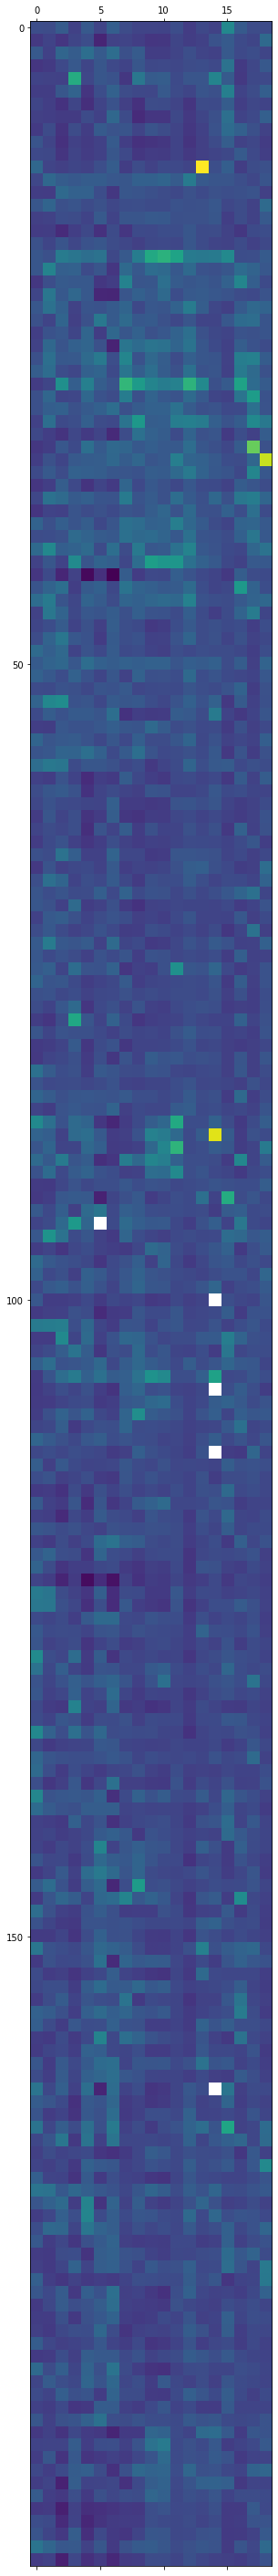

In [78]:
plt.figure(figsize=(5,50)) #This sets the figure size
plt.matshow(z,fignum =1) #This shows the graphic of the heatmap

In [79]:
for x in range(3,(z.shape[1]+3)): # counts through columns
    print(x,"k: ", z[x].kurt(),"s: ", z[x].skew(),"v: ",z[x].var()) #This prints the kutosis,skew, and variance
    if z[x].kurt() > 40: #If the kurtosis is below 40 there will be no checkfor outliers
        cutoff = z[x].quantile(.999) #This means that the cutoff value will be 99.9percent
        for y in range(z.shape[0]): #counts through rows
            if z[x][y] > cutoff: #If the z value is greater than the cutoff number
                z[x][y] = 'NaN' #Then it is treated as not a number
z

3 k:  0.8039599 s:  1.0328448 v:  1.0000003576278687
4 k:  1.3498291 s:  1.2846323 v:  0.9999999403953552
5 k:  1.4306996 s:  0.6661946 v:  1.000000238418579
6 k:  7.974573 s:  2.2166114 v:  1.0000001192092896
7 k:  0.41133443 s:  0.0792537 v:  0.9999999403953552
8 k:  0.35096973 s:  0.3330114 v:  0.8600127696990967
9 k:  0.1900826 s:  -0.28334397 v:  1.0000001192092896
10 k:  6.2593913 s:  1.8163499 v:  1.0000001192092896
11 k:  4.188827 s:  1.5933665 v:  1.0
12 k:  5.7232285 s:  1.8111748 v:  1.0000004768371582
13 k:  6.053182 s:  1.8327754 v:  1.0000003576278687
14 k:  13.223928 s:  3.4299788 v:  1.0
15 k:  4.992647 s:  1.5414177 v:  1.000000238418579
16 k:  69.15764 s:  6.8978496 v:  0.9999999403953552
17 k:  58.00869 s:  6.3094597 v:  0.9904044270515442
18 k:  6.498834 s:  1.9850928 v:  1.0000003576278687
19 k:  4.2721124 s:  1.7787583 v:  0.9999999403953552
20 k:  17.346104 s:  3.3402708 v:  1.0000004768371582
21 k:  42.25485 s:  4.9482217 v:  0.9999999403953552


,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.159682,-0.174393,0.563728,-0.746859,0.489293,-0.598122,0.765874,-0.204941,-0.566587,-0.592686,-0.664259,-0.163753,-0.959138,-0.431142,-0.718872,3.186422,0.504450,-0.180190,-0.233794
1,-1.175557,-0.625011,-1.286614,-0.521410,-0.166313,-2.049299,-0.715268,-0.612348,-0.895658,-1.240405,-1.182066,-0.540055,-0.939971,-0.739507,0.095698,0.548883,-0.310990,-0.547647,1.357145
2,0.451443,-0.762231,1.170505,0.662265,1.664313,0.525066,1.587676,-0.009524,0.612470,-0.915468,-0.938141,-0.592529,-0.097293,-0.579486,-0.737255,0.465346,-0.362394,-0.122837,-0.531246
3,-1.248780,-1.123182,-0.367547,0.399056,-0.542821,0.286266,-0.376422,-0.673613,0.331984,-0.399155,-0.384787,-0.481214,-0.193277,-0.143725,-0.382931,1.882299,-1.096731,-0.502903,0.407314
4,-0.671458,-0.704794,-0.733568,5.366850,-0.460153,0.311823,0.070711,-1.208970,2.158120,0.597271,0.694846,-0.286329,0.260106,0.242446,2.915641,0.549260,-1.156406,-0.432750,-0.347319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.166920,-1.057031,-2.298274,-0.723020,-1.594057,-1.470230,-1.317898,-1.078713,-1.145178,-0.062636,0.118689,-0.356749,-0.301225,-0.507247,-0.056621,-1.024997,-1.045794,0.483762,-0.367538
196,-0.123783,-0.307534,-1.786672,-0.658363,-1.911270,-1.385960,-1.038811,-0.978099,-0.979541,-0.067458,-0.323072,-0.419154,-0.180407,-0.604369,-0.255683,-1.020007,-0.904220,0.147599,0.111871
197,0.177323,-0.548805,-1.159165,0.724319,-1.583346,-0.371527,-1.083838,-1.253826,-0.611660,0.325738,0.258521,-0.409196,-0.375737,0.018562,0.163234,-1.079234,-1.039119,-0.703657,0.476917
198,2.010663,1.144004,0.358544,0.497775,-0.712823,0.332518,-1.112809,0.017848,0.540543,0.650618,0.309233,-0.279213,0.032699,0.288621,0.158867,-1.062158,0.179800,-0.486044,1.386117


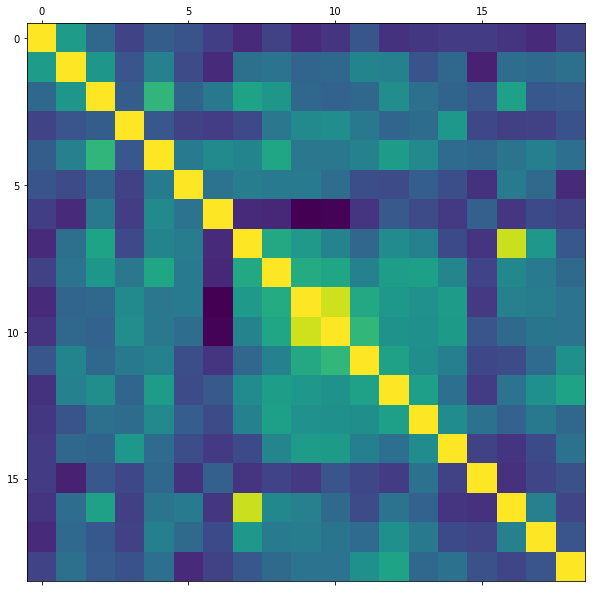

In [80]:
plt.matshow(z.corr()) #This plots the correlation matrix of the mineral concentrations

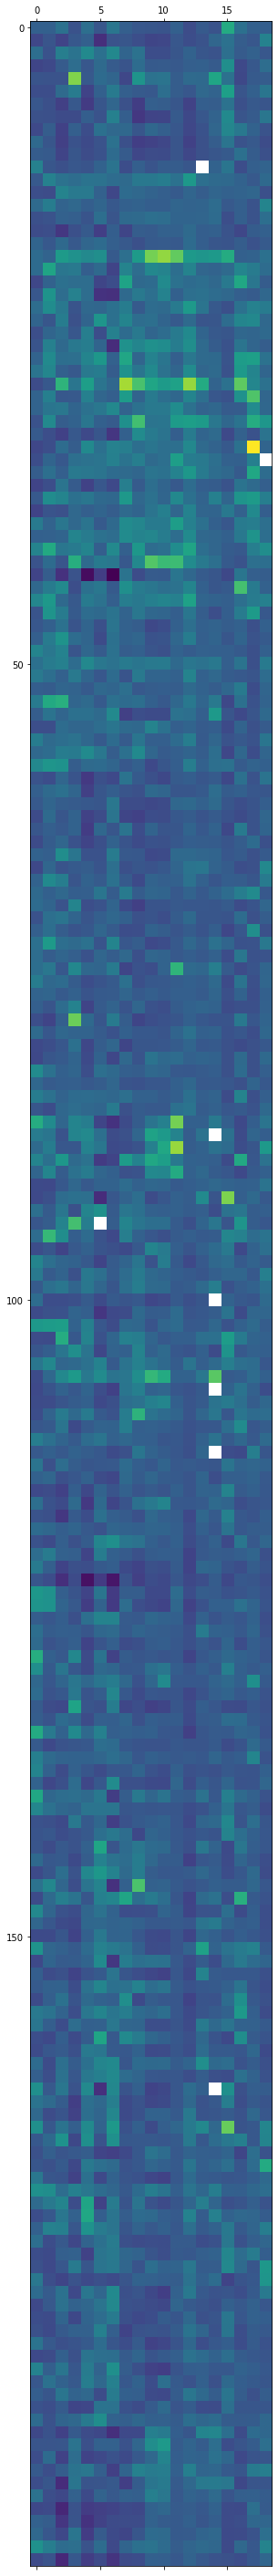

In [81]:
plt.figure(figsize=(5,50)) #This sets the figure size
plt.matshow(z,fignum=1) #This shows the graphic of the heatmap

In [82]:
f = pd.DataFrame(np.arange(4400).reshape(200,22)) #This means that all of the date on the right side of the equals sign is now denoted as f,pd dataframe means we are pulling the dataframe from the pandas library,the dot means we are choosing one function called dataframe fromthe library,np.arrange measn we are choosing the arrange function form the numpy library,we are analyzing (4221) data points from our csv file and reshaping them into 201 columns and 21 rows       
f = f.astype(str) #This coverts the data denoted as f into a new type called string
for x in range(data.shape[0]):
    f[0][x] = 'x'
f[1] = data0[1] #This means that column zero in dataframe f is coulmn zero in dataframe zero
f[2] = data0[2] #This means that column one in dataframe f is column one in dataframe zero
for x in range(3,(z.shape[1])+3): #Counts through columns
    f[x] = z[x] #This means that every column in f equals every column in z,this is the operation where we are adding abck the two columns that were dropped back at the beginning 
f

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,x,318684.0,1.0,-0.159682,-0.174393,0.563728,-0.746859,0.489293,-0.598122,0.765874,...,-0.592686,-0.664259,-0.163753,-0.959138,-0.431142,-0.718872,3.186422,0.504450,-0.180190,-0.233794
1,x,588141.0,1.0,-1.175557,-0.625011,-1.286614,-0.521410,-0.166313,-2.049299,-0.715268,...,-1.240405,-1.182066,-0.540055,-0.939971,-0.739507,0.095698,0.548883,-0.310990,-0.547647,1.357145
2,x,588646.0,1.0,0.451443,-0.762231,1.170505,0.662265,1.664313,0.525066,1.587676,...,-0.915468,-0.938141,-0.592529,-0.097293,-0.579486,-0.737255,0.465346,-0.362394,-0.122837,-0.531246
3,x,588448.0,1.0,-1.248780,-1.123182,-0.367547,0.399056,-0.542821,0.286266,-0.376422,...,-0.399155,-0.384787,-0.481214,-0.193277,-0.143725,-0.382931,1.882299,-1.096731,-0.502903,0.407314
4,x,1583.0,1.0,-0.671458,-0.704794,-0.733568,5.366850,-0.460153,0.311823,0.070711,...,0.597271,0.694846,-0.286329,0.260106,0.242446,2.915641,0.549260,-1.156406,-0.432750,-0.347319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,x,483184.0,8.0,-1.166920,-1.057031,-2.298274,-0.723020,-1.594057,-1.470230,-1.317898,...,-0.062636,0.118689,-0.356749,-0.301225,-0.507247,-0.056621,-1.024997,-1.045794,0.483762,-0.367538
196,x,483188.0,8.0,-0.123783,-0.307534,-1.786672,-0.658363,-1.911270,-1.385960,-1.038811,...,-0.067458,-0.323072,-0.419154,-0.180407,-0.604369,-0.255683,-1.020007,-0.904220,0.147599,0.111871
197,x,483190.0,8.0,0.177323,-0.548805,-1.159165,0.724319,-1.583346,-0.371527,-1.083838,...,0.325738,0.258521,-0.409196,-0.375737,0.018562,0.163234,-1.079234,-1.039119,-0.703657,0.476917
198,x,483187.0,8.0,2.010663,1.144004,0.358544,0.497775,-0.712823,0.332518,-1.112809,...,0.650618,0.309233,-0.279213,0.032699,0.288621,0.158867,-1.062158,0.179800,-0.486044,1.386117


In [83]:
f.to_csv('LeafStageVar_x_New_ionStats.csv',header = ('INVO','Spec_int','B11','Na23','Mg26','Al27','P31','S34','K39','Ca44','Fe54','Mn55','Co59','Ni60','Cu63',
                                      'Zn66','As75','Rb85','Sr88','Mo98','Cd111'))

ValueError: Writing 22 cols but got 21 aliases